In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

file_path = 'd:/data/insurance/insurance_data.csv'
data = pd.read_csv(file_path)

print(data.head())

   Age  Gender  Driving_Experience  Accident_History Vehicle_Type  \
0   63  Female                  35                 0        Coupe   
1   39  Female                  30                 1        Coupe   
2   42  Female                  19                 0        Truck   
3   21  Female                  17                 0        Coupe   
4   35  Female                  34                 1        Sedan   

   Annual_Mileage  Vehicle_Age  Location  Credit_Score  Vehicle_Value  \
0           18878            3     Rural           731          10399   
1           29742            6     Urban           316           8227   
2            5153            2  Suburban           320          36912   
3           11738            1     Urban           424          22304   
4           20747            6     Rural           794           5967   

   Insurance  
0    1427.89  
1    2279.37  
2     961.77  
3     829.94  
4    1647.02  


In [2]:
#성별 'Male', 'Female'을 1과 0으로 변환
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

#위치 'Urban', 'Suburban', 'Rural'을 0, 1, 2로 변환
data['Location'] = data['Location'].map({'Urban': 0, 'Suburban': 1, 'Rural': 2})

In [3]:
X = data[['Age', 'Gender', 'Driving_Experience', 'Accident_History', 'Vehicle_Type', 'Annual_Mileage', 'Vehicle_Age', 'Location', 'Credit_Score', 'Vehicle_Value']]
y = data['Insurance']

In [4]:
#범주형 변수 처리(Vehicle_Type: 0: Sedan, 1: SUV, 2: Truck, 3: Coupe, 4: Van)
vehicle_type_mapping = {'Sedan': 0, 'SUV': 1, 'Truck': 2, 'Coupe': 3, 'Van': 4}
X['Vehicle_Type'] = X['Vehicle_Type'].map(vehicle_type_mapping)

C:\Users\TJ\AppData\Local\Temp\ipykernel_10492\2344957756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vehicle_Type'] = X['Vehicle_Type'].map(vehicle_type_mapping)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 69.90805603775397
R-squared: 0.9735233499375764


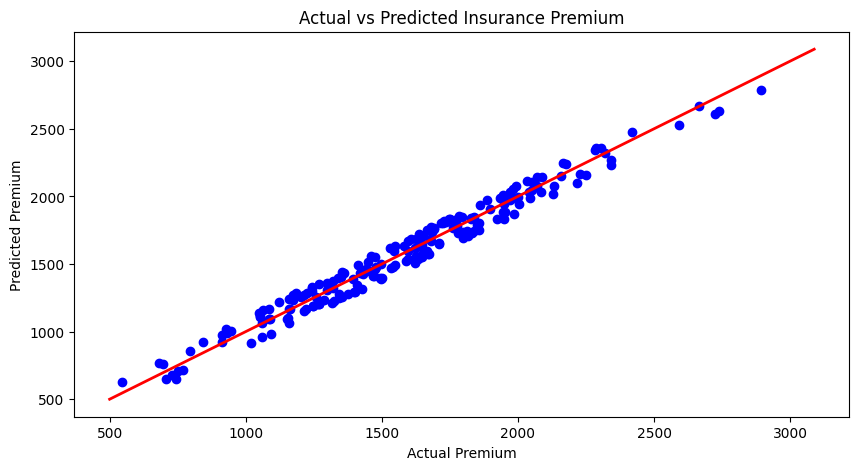

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.title('Actual vs Predicted Insurance Premium')
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.show()

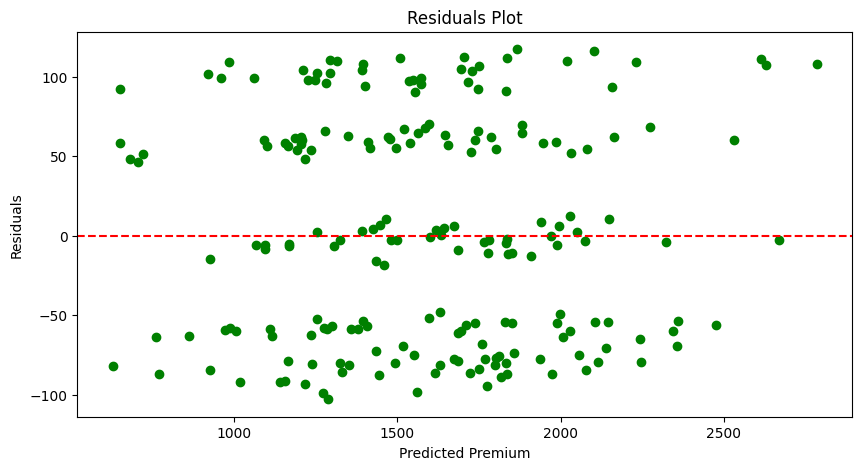

In [8]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Premium')
plt.ylabel('Residuals')
plt.show()

In [9]:
import joblib
joblib.dump(model, 'd:/data/insurance/insurance_model.joblib')
print("모델 저장 완료")

모델 저장 완료
